
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None
******************************************************************************************************************************************************


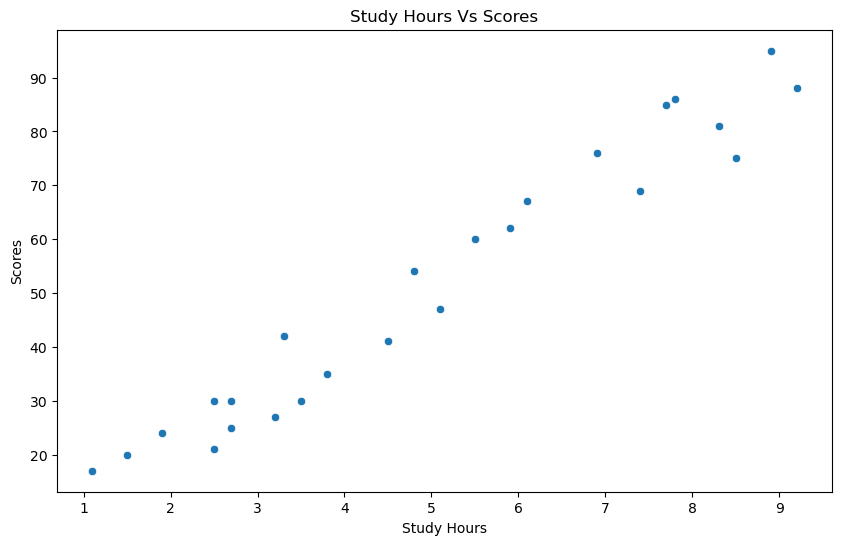

******************************************************************************************************************************************************


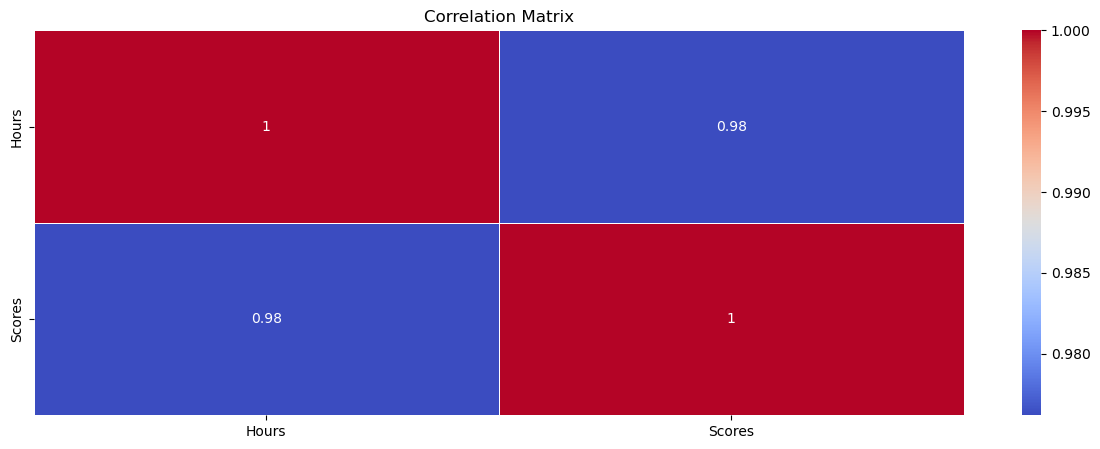

******************************************************************************************************************************************************

Mean Squared Error: 28.88273050924546
R-squared: 0.9529481969048356
******************************************************************************************************************************************************


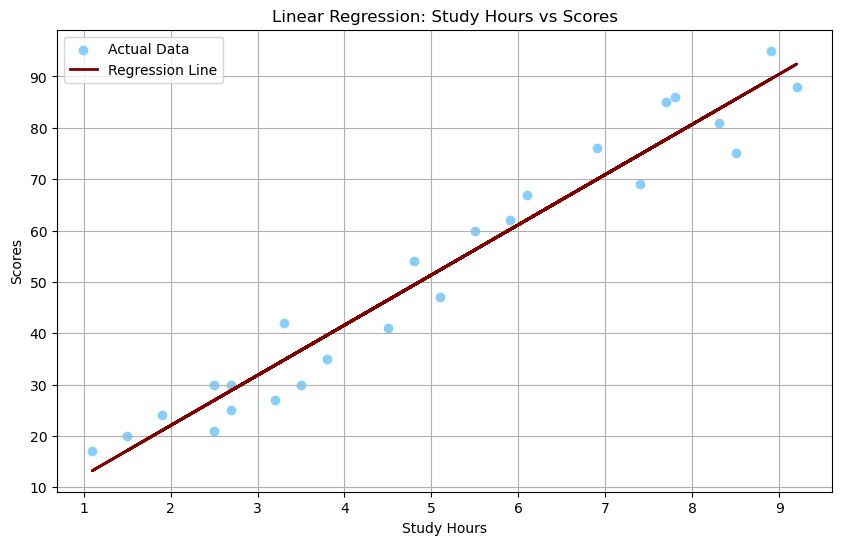

******************************************************************************************************************************************************
Accuracy: 1.0
******************************************************************************************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

******************************************************************************************************************************************************
The total number of students who fail: 14
The total number of students who pass: 11


In [25]:
#Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

#loading the dataset
dataFrame = pd.read_csv('student_scores.csv')

#Displaying Dataset Information
print("\nDataset information:")
print(dataFrame.info())
print("*"*150)

#Scatter plot of Study Hours Vs Scores
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Hours', y='Scores', data=dataFrame)  
plt.title('Study Hours Vs Scores')  
plt.xlabel('Study Hours') 
plt.ylabel('Scores') 
plt.show() 
print("*"*150)

#Visualization of Correlation Matrix
corr_matrix = dataFrame[['Hours', 'Scores']].corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
print("*"*150)

#Linear Regression Model and Evaluation

X = dataFrame[['Hours']]  # Features (Study Hours)
y = dataFrame['Scores']   # Target (Scores)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R-squared: {r2}')
print("*"*150)

#Visualization of Linear Regression Results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='lightskyblue', label='Actual Data')
plt.plot(X, y_pred, color='maroon', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Study Hours vs Scores')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()
print("*"*150)

#Create Pass Indicator
dataFrame['Pass'] = dataFrame['Scores'].apply(lambda x: 1 if x >= 60 else 0)

# Split data into X (features) and y (target)
X = dataFrame[['Hours']]  # Features (Study Hours)
y = dataFrame['Pass']     # Target (Pass or Fail)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=10000, solver='liblinear', penalty='l2', C=1.0)
model.fit(X_train_scaled, y_train)

# Predict on test data
y_predict = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predict)
class_report = classification_report(y_test, y_predict)

# Display results
print("Accuracy:", accuracy)
print("*"*150)

print("Classification Report:\n", class_report)
print("*"*150)


data_path = 'student_scores.csv'
# Read data from the CSV file
df = pd.read_csv(data_path)

df['Pass'] = df['Scores'].apply(lambda x: 1 if x >= 60 else 0)
df['Pass'] = df['Pass'].astype(int)  

# Calculate the number of students who fail and pass
number_of_fail = df[df['Pass'] == 0].shape[0]
number_of_pass = df[df['Pass'] == 1].shape[0]

# print the number of students who fail and who pass
print(f"The total number of students who fail: {number_of_fail}")
print(f"The total number of students who pass: {number_of_pass}")